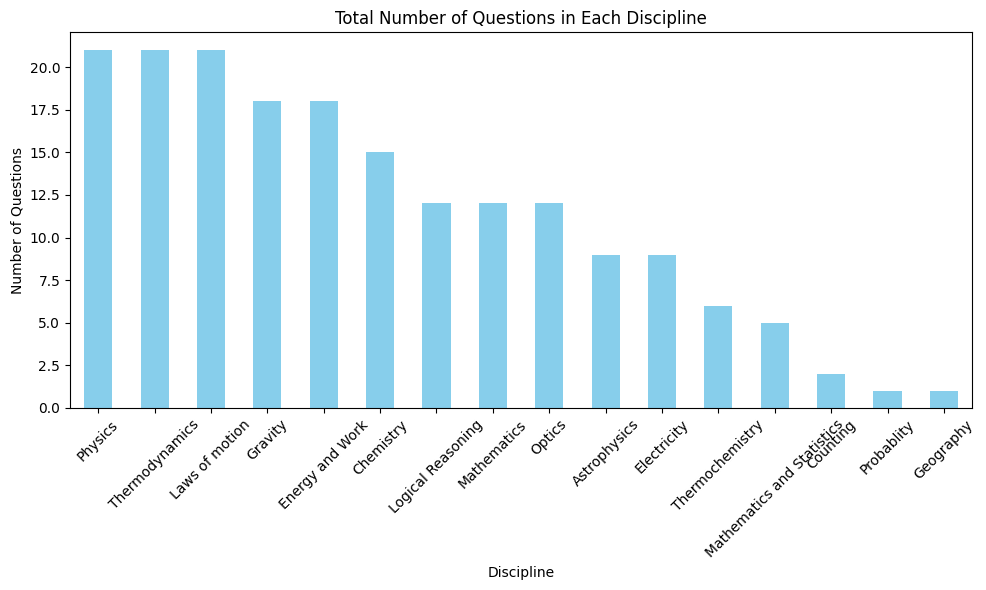

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('annotated_dataset_flaw_type.csv')

# Calculate the number of questions per discipline
discipline_counts = data['Discipline'].value_counts()

# Plotting the results
plt.figure(figsize=(10, 6))
discipline_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Questions in Each Discipline')
plt.xlabel('Discipline')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


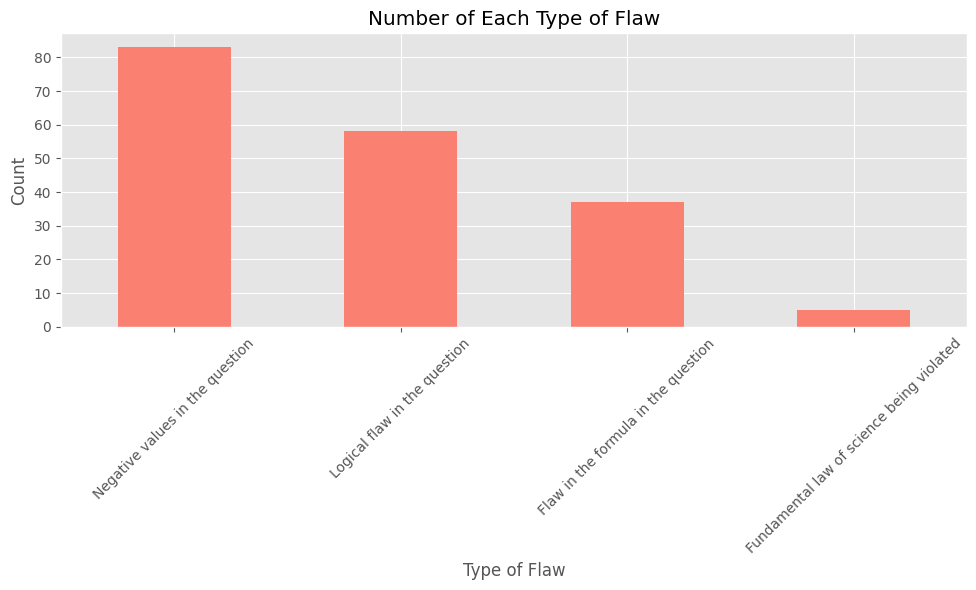

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# data = pd.read_csv('path_to_your_dataset.csv')

# Mapping numerical flaw types to descriptive strings
flaw_mapping = {
    # 0: 'No flaw detected',
    1: 'Negative values in the question',
    2: 'Fundamental law of science being violated',
    3: 'Logical flaw in the question',
    4: 'Flaw in the formula in the question'
}

# Replace numerical values with descriptive strings
data['Type of Flaw'] = data['Type of Flaw'].map(flaw_mapping)

# Calculate the number of each type of flaw
flaw_counts = data['Type of Flaw'].value_counts()

# Plotting the results
plt.figure(figsize=(10, 6))
flaw_counts.plot(kind='bar', color='salmon')
plt.title('Number of Each Type of Flaw')
plt.xlabel('Type of Flaw')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


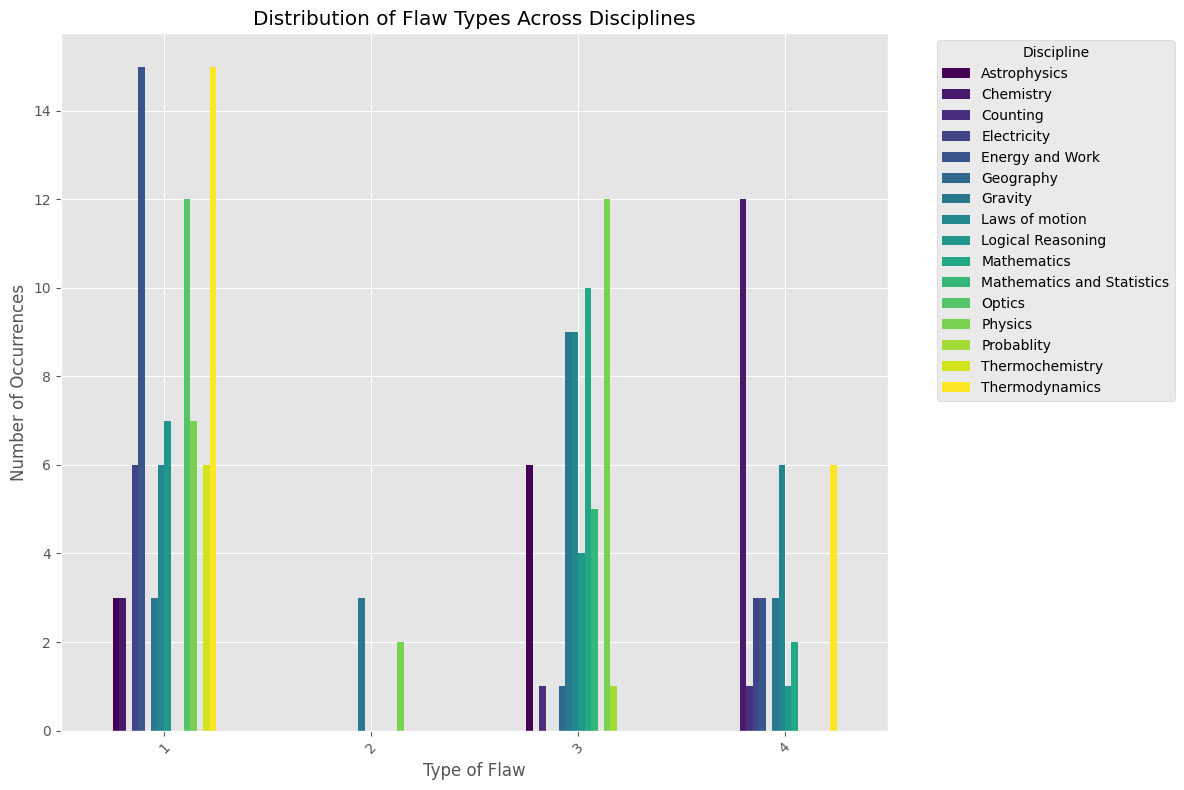

In [45]:
# Grouping the type of flaw by discipline and counting entries
flaw_discipline = data.groupby('Type of Flaw')['Discipline'].value_counts().unstack().fillna(0)

# Plotting the results
flaw_discipline.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Distribution of Flaw Types Across Disciplines')
plt.xlabel('Type of Flaw')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Discipline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


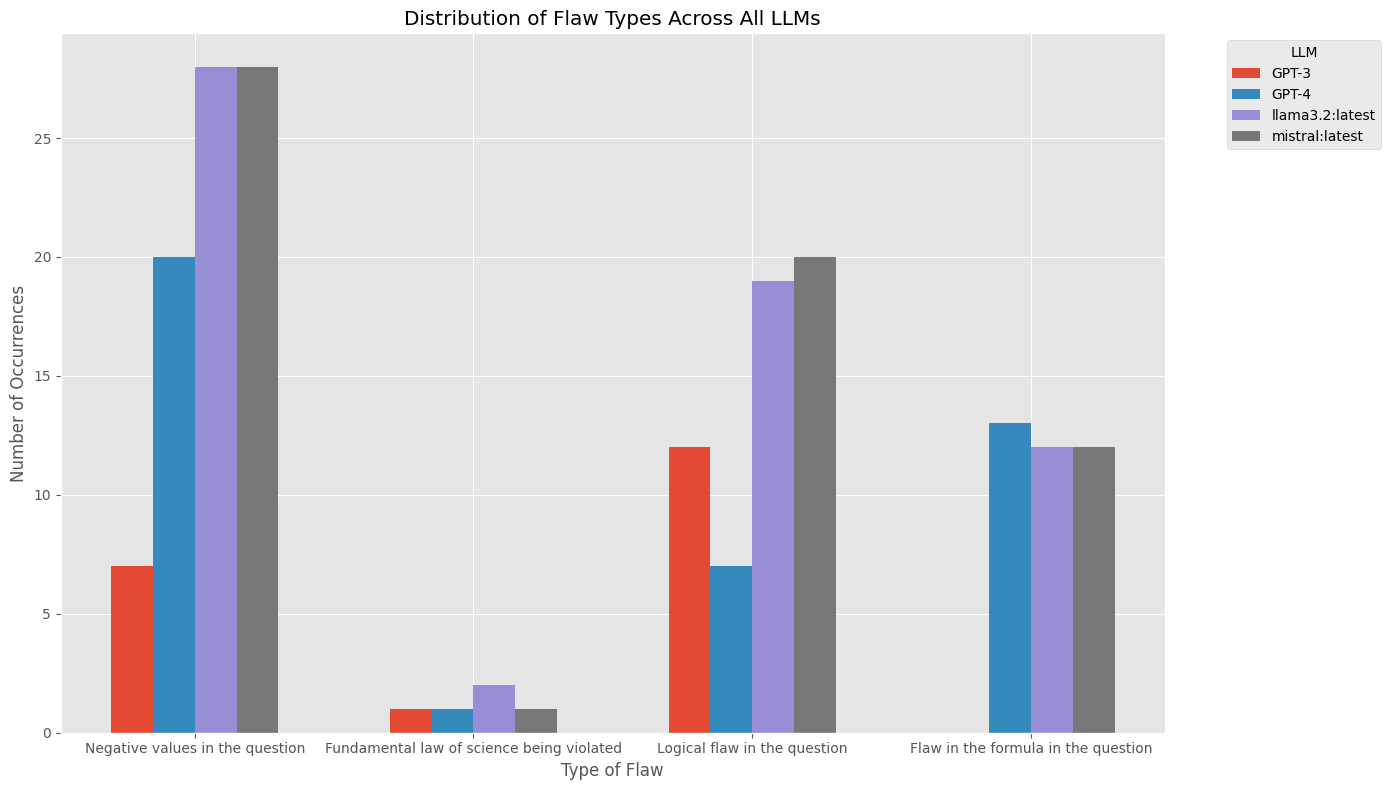

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('annotated_dataset_flaw_type.csv')  # Adjust the path to your file

# Mapping for types of flaws
flaw_mapping = {
    1: 'Negative values in the question',
    2: 'Fundamental law of science being violated',
    3: 'Logical flaw in the question',
    4: 'Flaw in the formula in the question'
}

# Group data by LLM and Type of Flaw, and count occurrences
flaw_by_llm = data.groupby(['Which top LLM you tried', 'Type of Flaw']).size().unstack(fill_value=0)

# Apply the mapping to the column names
flaw_by_llm.columns = [flaw_mapping.get(int(x), x) for x in flaw_by_llm.columns]


# Setting the colors and style
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14, 8))

# Number of locations for the groups
ind = np.arange(len(flaw_by_llm.columns))  # the x locations for the groups

# Width of the bars: can adjust if necessary
width = 0.15  

# Generate bars for each LLM
for i, llm in enumerate(flaw_by_llm.index):
    # We shift each bar group to the right by 'width * i'
    ax.bar(ind + width * i, flaw_by_llm.loc[llm], width, label=llm)

# Set the position of the bars on the x-axis
ax.set_xticks(ind + width * (len(flaw_by_llm.index) - 1) / 2)
ax.set_xticklabels(flaw_by_llm.columns)

# Adding labels and titles
ax.set_xlabel('Type of Flaw')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Distribution of Flaw Types Across All LLMs')

# Adding a legend
ax.legend(title='LLM', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
